## 데이터 LOAD

In [1]:
## Json 문제가 나왔을때 읽는법 
import json 
with open('group.json','r') as f:
    data = json.load(f)

dic = { 'total' : len(data)}

with open('경로','w') as f:
    json.dump(dic,f)
    



FileNotFoundError: [Errno 2] No such file or directory: 'group.json'

In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('./Data/예측 data/train.csv',encoding='cp949')
test = pd.read_csv('./Data/예측 data/test.csv',encoding='cp949')

In [305]:
train.shape , test.shape

((10886, 12), (6493, 9))

In [306]:
train['tempDate'] = train['datetime'].apply(lambda x : x.split())
test['tempDate'] = test['datetime'].apply(lambda x : x.split())

In [307]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 데이터 전처리


### 결측값 

In [308]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
tempDate      0
dtype: int64

In [309]:
# train = train[~train['tempDate'].isnull()] # 만약 tempDate가 결측값이 있다면 처리
# train.dropna(axis=0) # 모든 행 결측치 처리 

### 변수 생성

In [310]:
train['tempDate'] = train['datetime'].apply(lambda x : x.split()) # 분리
test['tempDate']  = test['datetime'].apply(lambda x : x.split())

In [311]:
# split으로 변수 생성  
train['Year'] = train['tempDate'].apply(lambda x:x[0].split('-')[0])
train['Month'] = train['tempDate'].apply(lambda x:x[0].split('-')[1])
train['Day'] = train['tempDate'].apply(lambda x:x[0].split('-')[2])
train['Hour'] = train['tempDate'].apply(lambda x:x[1].split(':')[0])

test['Year'] = train['tempDate'].apply(lambda x:x[0].split('-')[0])
test['Month'] = train['tempDate'].apply(lambda x:x[0].split('-')[1])
test['Day'] = train['tempDate'].apply(lambda x:x[0].split('-')[2])
test['Hour'] = train['tempDate'].apply(lambda x:x[1].split(':')[0])

In [312]:
# 숫자형으로 변경
train['Year'] = train['Year'].astype(int)
train['Month'] = train['Month'].astype(int)
train['Day'] = train['Day'].astype(int)
train['Hour'] = train['Day'].astype(int)

test['Year'] = train['Year'].astype(int)
test['Month'] = train['Month'].astype(int)
test['Day'] = train['Day'].astype(int)
test['Hour'] = train['Day'].astype(int)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  Year        10886 non-null  int32  
 14  Month       10886 non-null  int32  
 15  Day         10886 non-null  int32  
 16  Hour        10886 non-null  int32  
dtypes: float64(3), int32(4), int64(8), object(2)
memory usage: 1.2+ MB


In [313]:
def new_month(Month):
    if Month in [12,1,2]:
        return 4
    elif Month in [3,4,5]:
        return 1
    elif Month in [6,7,8]:
        return 2
    elif Month in [9,10,11]:
        return 3

train['season'] = train['Month'].apply(new_month)
test['season'] = test['Month'].apply(new_month)

In [314]:
train.drop('tempDate',axis=1,inplace=True)
test.drop('tempDate',axis=1,inplace=True)
# train.drop(columns=['a','b'],axis=1) # 컬럼 여러개일때 

In [315]:
train.shape , test.shape

((10886, 16), (6493, 13))

### 시각화

In [316]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  Year        10886 non-null  int32  
 13  Month       10886 non-null  int32  
 14  Day         10886 non-null  int32  
 15  Hour        10886 non-null  int32  
dtypes: float64(3), int32(4), int64(8), object(1)
memory usage: 1.2+ MB


In [317]:
num_var = train.select_dtypes(exclude=[object])
num_var.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'Year',
       'Month', 'Day', 'Hour'],
      dtype='object')

### 범주형 시각화

<Axes: xlabel='Year'>

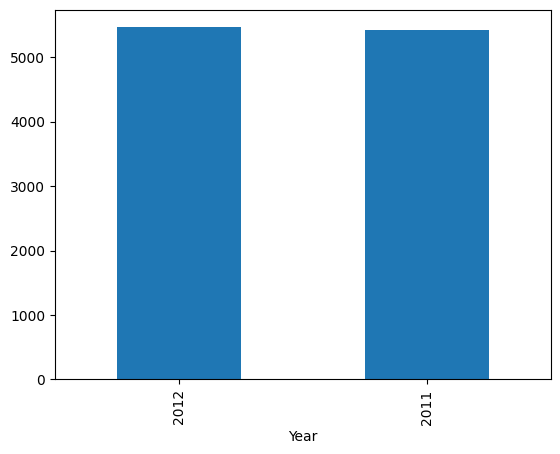

In [318]:
# Year 카테고리에 따라 예측값 count 보고 싶을때 #
# sns.barplot(x='Year',y='count',data=train.groupby('Year')['count'].mean().reset_index())
# sns.barplot(x='Year',y='count',data=train) # 예측값 count개수 와 관련 

# 단순히 범주별 개수가 몇개인지 보고싶을떄
train['Year'].value_counts().plot(kind='bar')

<Axes: xlabel='season', ylabel='count'>

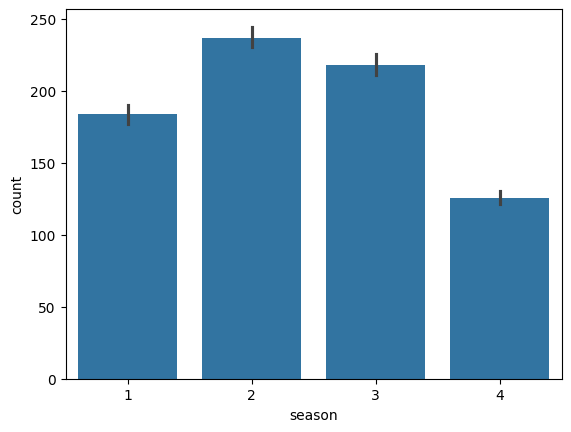

In [319]:
# 각 카테고리에 따라 예측값 count 보고싶을떄
# sns.barplot(x='holiday',y='count',data=train)
# sns.barplot(x='weather',y='count',data=train)
# sns.barplot(x='workingday',y='count',data=train)
sns.barplot(x='season',y='count',data=train)

### 연속형 시각화

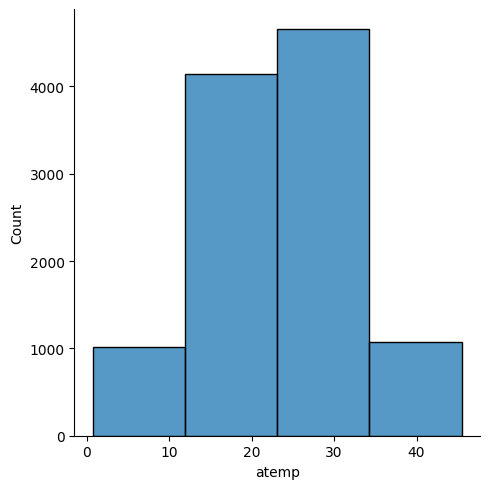

In [320]:
# sns.histplot(x='temp',data=train)
sns.displot(x='atemp',data=train,binwidth=10) # 폭을 주고싶을때 

### 상관관계

In [321]:
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

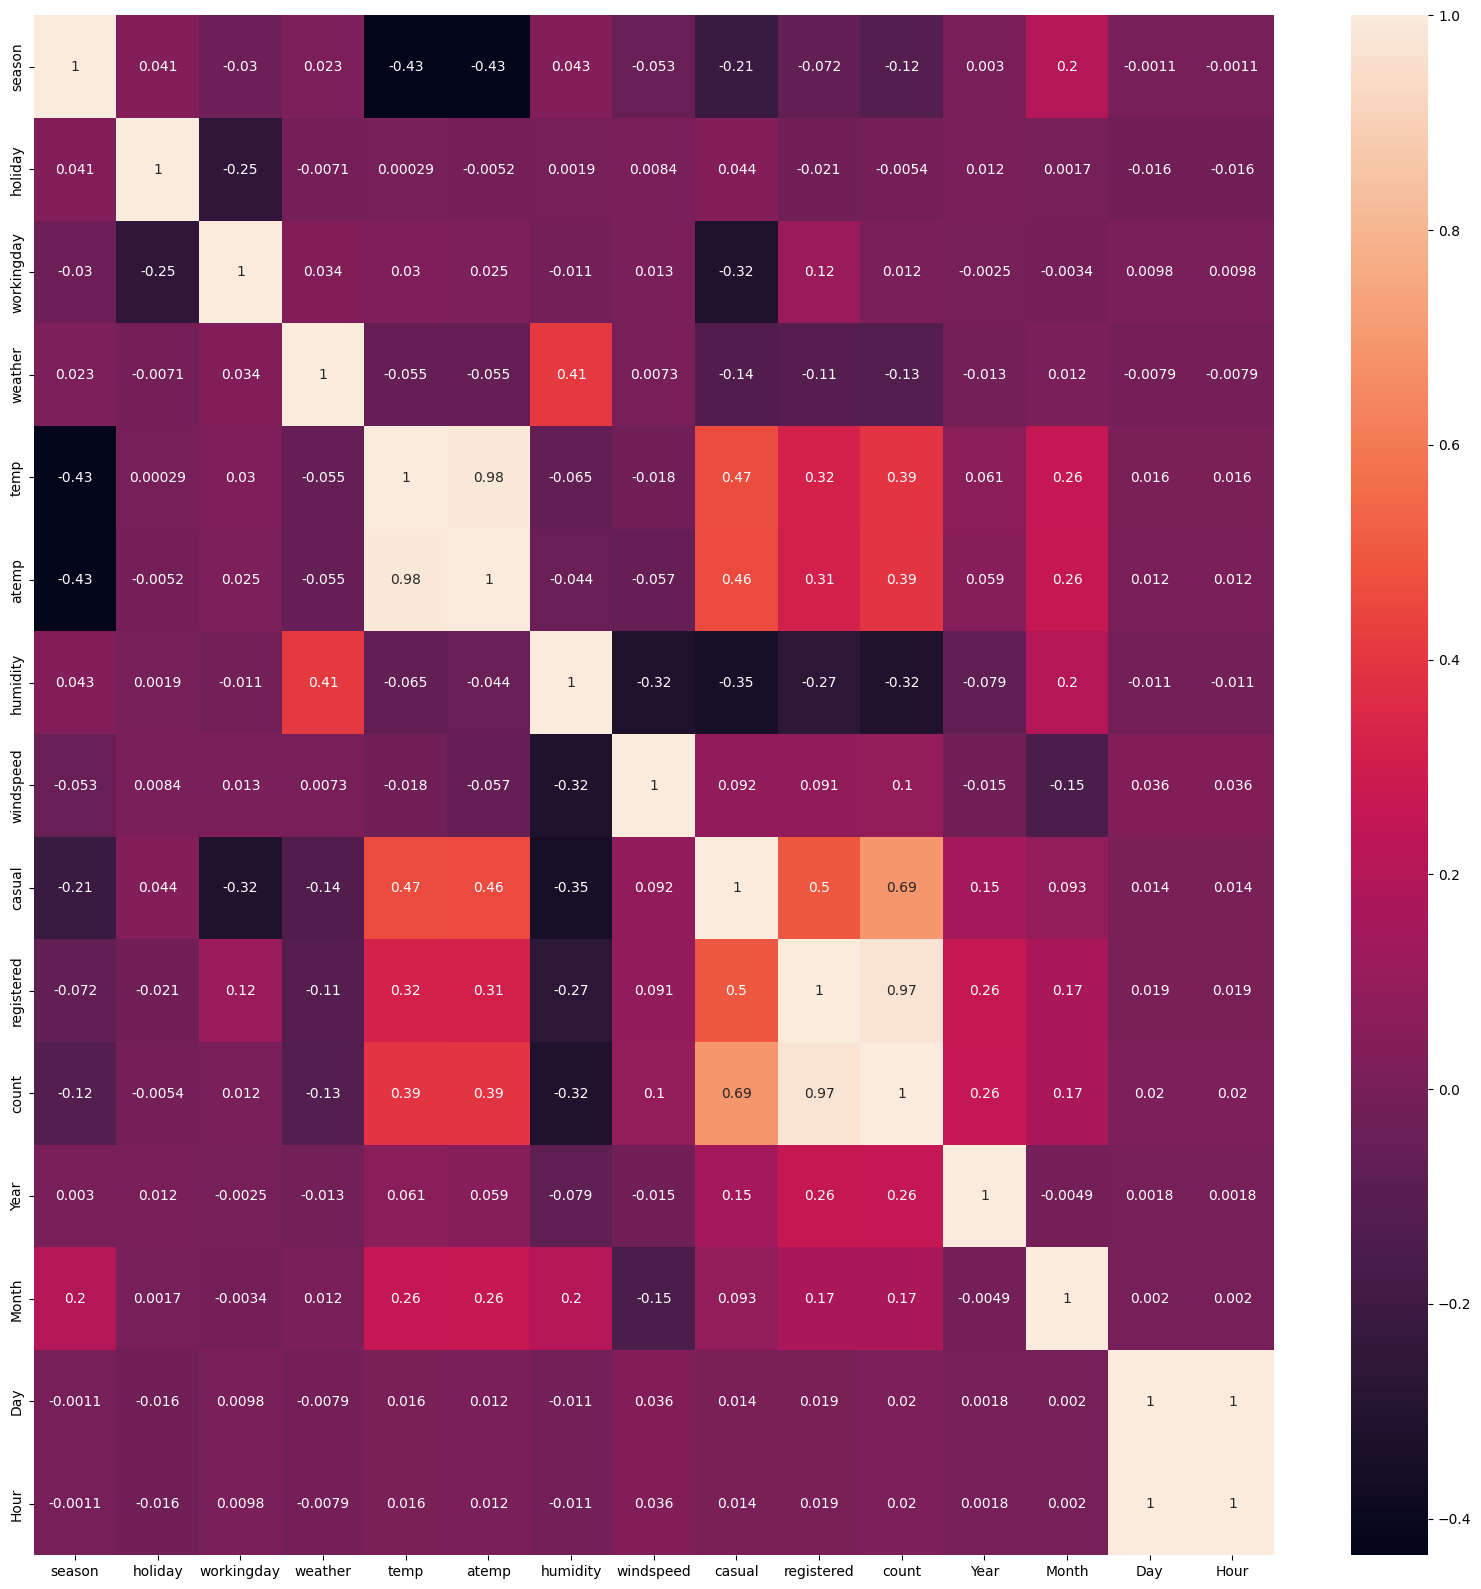

In [322]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True)

<Axes: xlabel='Hour', ylabel='count'>

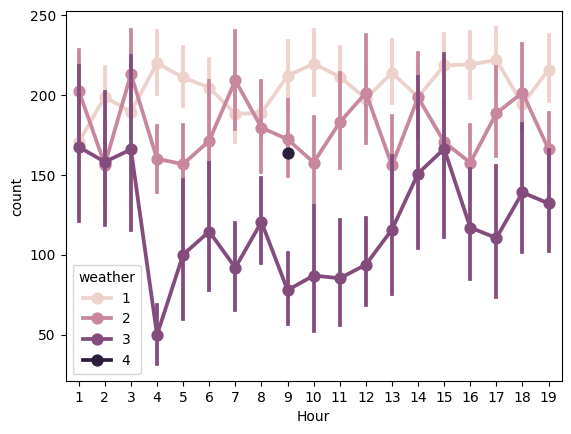

In [323]:
# 시간에 따른 count , 범주색
# sns.pointplot(x='Hour',y='count',hue='holiday',data=train)
sns.pointplot(x='Hour',y='count',hue='weather',data=train)

<Axes: xlabel='Month', ylabel='count'>

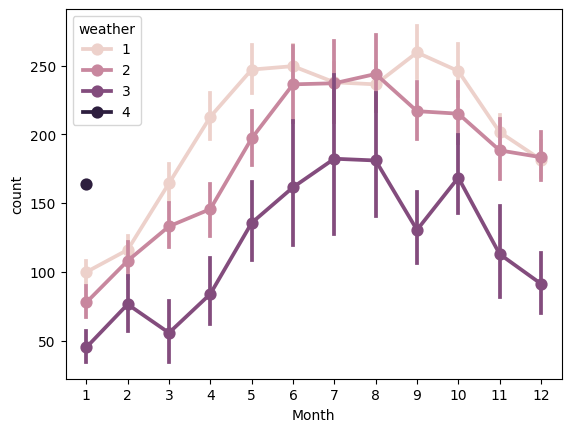

In [324]:
# 달에 따른 count , 범주색
sns.pointplot(x='Month',y='count',hue='weather',data=train)

### encoding

In [325]:
category_cal = train.select_dtypes('category').columns
train = pd.get_dummies(train,prefix=category_cal,columns=category_cal)
test = pd.get_dummies(test,prefix=category_cal,columns=category_cal)

In [326]:
train.shape , test.shape

((10886, 15), (6493, 12))

In [290]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler

In [381]:
col_list = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'Year', 'Month', 'Day', 'Hour']

In [383]:
X = train[col_list]
Y = train['count']
X_train , X_val , y_train , y_val = train_test_split(X,Y,test_size=0.3,random_state=200)

In [384]:
X_train.shape , X_val.shape , y_train.shape , y_val.shape , test.shape

((7620, 12), (3266, 12), (7620,), (3266,), (6493, 12))

In [385]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_val = scaler.transform(X_val)

In [386]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

train_pred = xgb_model.predict(X_train)
val_pred = xgb_model.predict(x_val)

r2_score(y_train,train_pred) , r2_score(y_val,val_pred)

c:\Users\User\document\etc study\studyvenv\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


(0.7324730282381281, 0.41558431595813683)

In [403]:
ori_pred = xgb_model.predict(test)
final_df = pd.DataFrame(ori_pred).reset_index().rename(columns={'index':'id'})
final_df
# final_df.to_csv('submission.to_csv')

c:\Users\User\document\etc study\studyvenv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\User\document\etc study\studyvenv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\User\document\etc study\studyvenv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\User\document\etc study\studyvenv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

,id,0
0,0,505.268311
1,1,594.005066
2,2,594.005066
3,3,505.268311
4,4,505.268311
...,...,...
6488,6488,573.719727
6489,6489,573.719727
6490,6490,573.719727
6491,6491,573.719727
